# **Week 2** 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



## **1- Color Spaces**



### RGB

When working on Image processing or computer vision tasks, you will observe that RGB (Red, Green and Blue) color space is usually the default space where your frames (or images) are loaded in. It is the most commonly understood color space, a three dimensional model, consist of three primary colors, and based on the combination of these colors you are able to generate any other possible color.




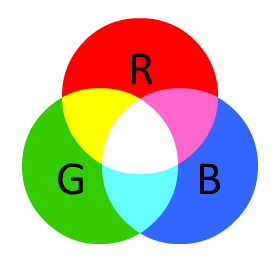


### HSV

Another popular color space is HSV, it is composed three components, Hue, Saturation and Value. In simple terms, Hue represents the actual pure color perceived by our eyes, Saturation is the colorfulness of that pure color (i.e decreasing Saturation reduces the colorfulness from the color itself), Value is the intensity of the color, correlates with the its darkness.


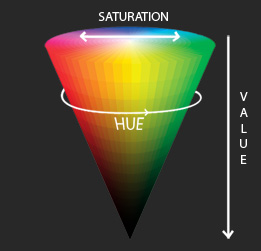

Since HSV is capable of separating pure colors from their lightness, this allows people to perform different operations on either the color itself (Hue) or its intensity (Value). For example, in computer vision applications, people are more interested in the color of the image but less interested in its lightness, in fact, in most applications lightness is considered a noise, because it could affect the image uniqueness without having a real change in it (except for the lightness).

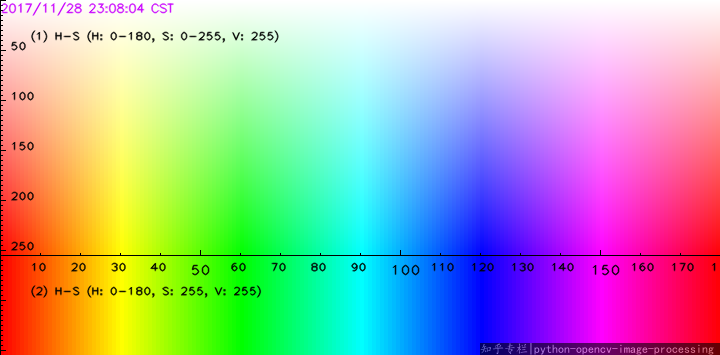

### RGB vs. HSV


Practical Example

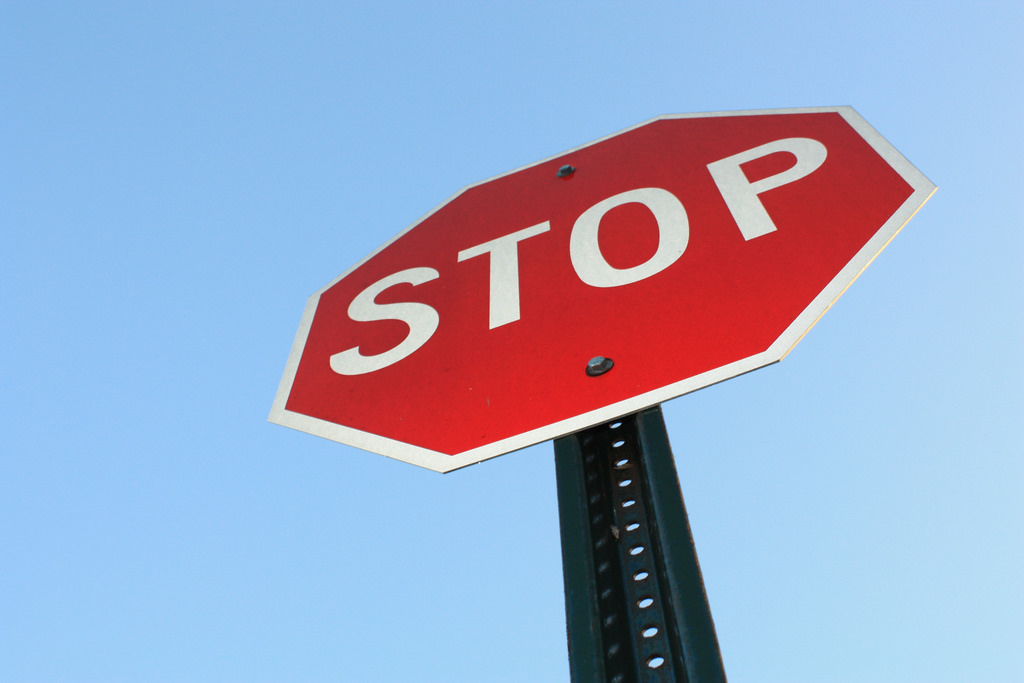

If we wanted to detect the stop sign in the image above, the first thing you’d think of trying is to try and scan for the colour red in a specific range,(e.g.(130, 0, 0) -> (255, 0, 0)). However this doesn’t really solve the problem because most of the colour red in the stop sign image is still a mix of all three primary colours (due to illumination effect).

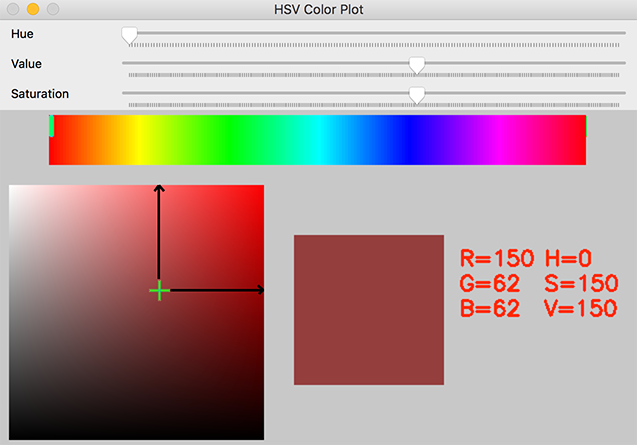

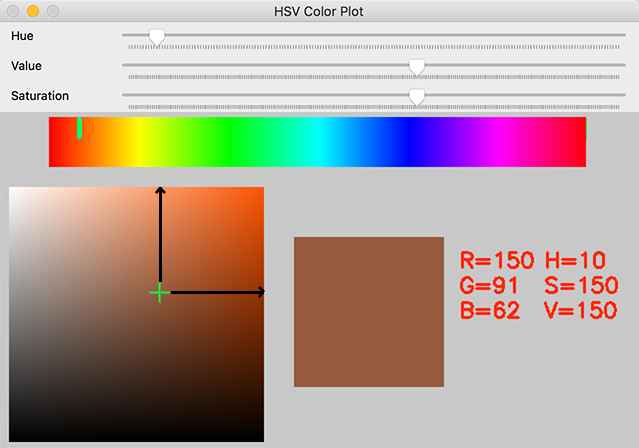

In [ ]:
sign_img=cv2.imread("sign.jpg")
img_hsv=cv2.cvtColor(sign_img, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = sign_img.copy()
output_img[np.where(mask==0)] = 0

output_img=cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)


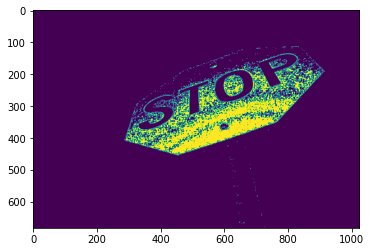

In [ ]:
plt.imshow(mask0)

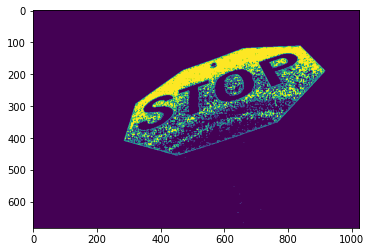

In [ ]:
plt.imshow(mask1)

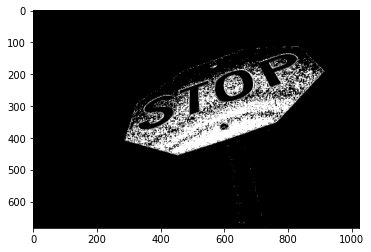

In [ ]:
plt.imshow(mask0,cmap='gray')

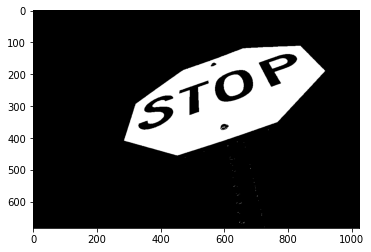

In [ ]:
plt.imshow(mask,cmap='gray')

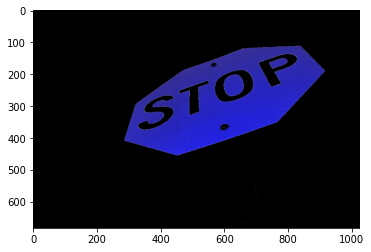

In [ ]:
plt.imshow(output_img)

### Lab


The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

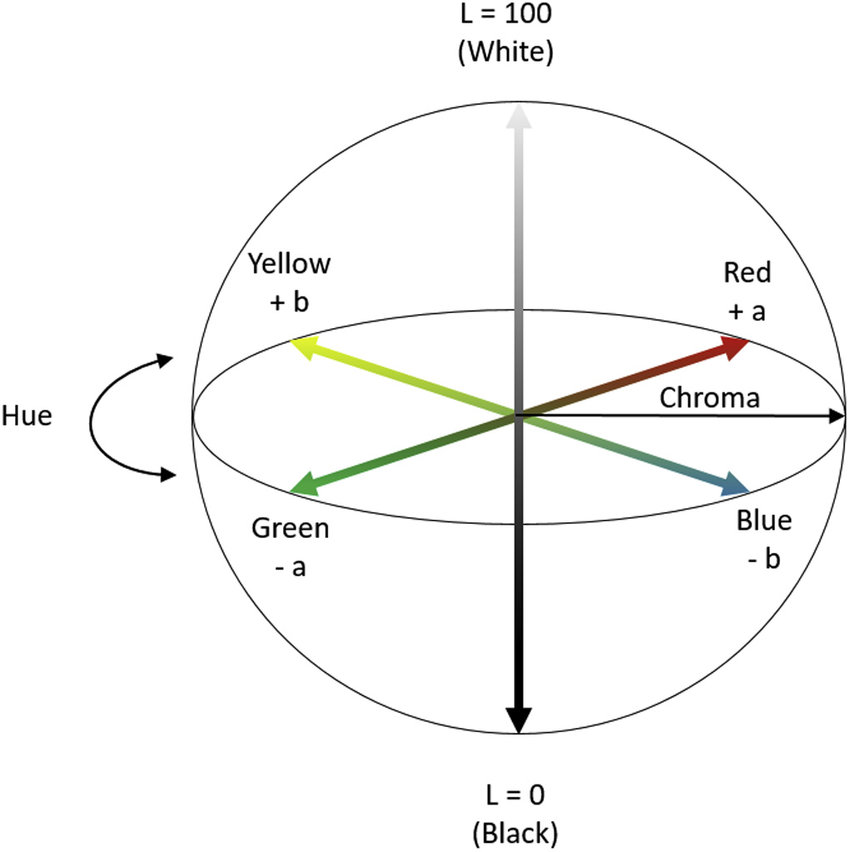

##2- Image Normalization




In [ ]:
img_normalized =cv2.normalize(sign_img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img_normalized = cv2.cvtColor(img_normalized, cv2.COLOR_BGR2RGB)

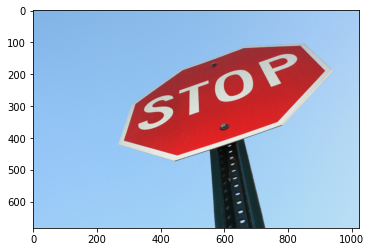

In [ ]:
plt.imshow(img_normalized)

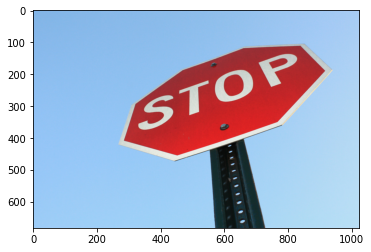

In [ ]:
plt.imshow(cv2.cvtColor(sign_img, cv2.COLOR_BGR2RGB))

(array([ 41205., 248101.,  30311.,   4992.,   3198., 241355., 290410.,
        382826., 325155., 530623.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

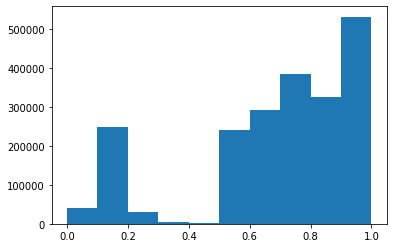

In [ ]:
plt.hist(img_normalized.ravel())

(array([ 41205., 248101.,  30311.,   4992.,   3198., 241355., 290410.,
        382826., 325155., 530623.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

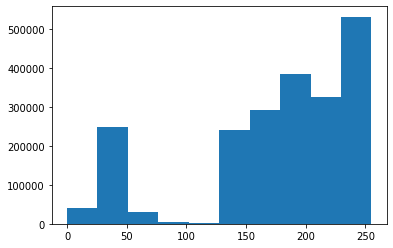

In [ ]:
plt.hist(sign_img.ravel())

## 3- Negative Image

In [ ]:
img_binary = cv2.imread("binary.jpg", 0)
print(img_binary.shape)
plt.imshow(img_binary,cmap='gray')

AttributeError: ignored

In [ ]:
plt.imshow(255-img_binary,cmap='gray')

TypeError: ignored